# Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

os.chdir('/content/drive/MyDrive/macro 1 2023.2/lista 2 - macro 1 - dados macroeconômicos/lista 2 - macro 1 - dados macroeconômicos')

# Dados coletados no IPEADATA

In [2]:
ipca = pd.read_csv('ipca.csv', sep = ';', decimal= ',')
ipca = ipca.rename( columns = {'IPCA - geral - taxa de variação - (% a.m.) - Instituto Brasileiro de Geografia e Estatística, Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC) - PRECOS12_IPCAG12':
                               'ipca'})
ipca = ipca[['Data', 'ipca']]
ipca = ipca.copy()
ipca = ipca.set_index('Data')

m2 = pd.read_csv('m2.csv', sep = ',', decimal = '.')
m2 = m2.rename( columns = {'Meio de pagamento ampliado - M2 - fim de período - R$ - Banco Central do Brasil- Notas Econômico-financeiras para a Imprensa- Política Monetária e Operações de Crédito do SFN (Bacen/Notas Imprensa/Moeda) - BM12_M2NCN12':
                           'M2'})
m2 = m2[['Data', 'M2']]
m2 = m2.copy()
m2 = m2.set_index('Data')

# calculo de taxa de variacao de m2

m2_list = m2['M2'].to_list()

taxa_variacao = []

for i in range(0, len(m2_list)):
    var = (m2_list[i] - m2_list[i-1]) / m2_list[i-1]
    taxa_variacao.append(var)


m2['variacao'] = [i * 100 for i in taxa_variacao]
m2.drop(m2.index[0], inplace=True)

# Def

In [3]:
def plot(df, x,time):
    plt.figure(figsize=(14,6))
    df[x].plot()
    plt.xlabel('')
    plt.title('IPCA Mensal Brasil - ({})'.format(time))
    plt.show()

# Realizar filtragem por data para plotagem dos dois momentos do ipca BRA

In [4]:
ipca_pre_real = ipca.iloc[0:175]
ipca_real = ipca.iloc[174:525]

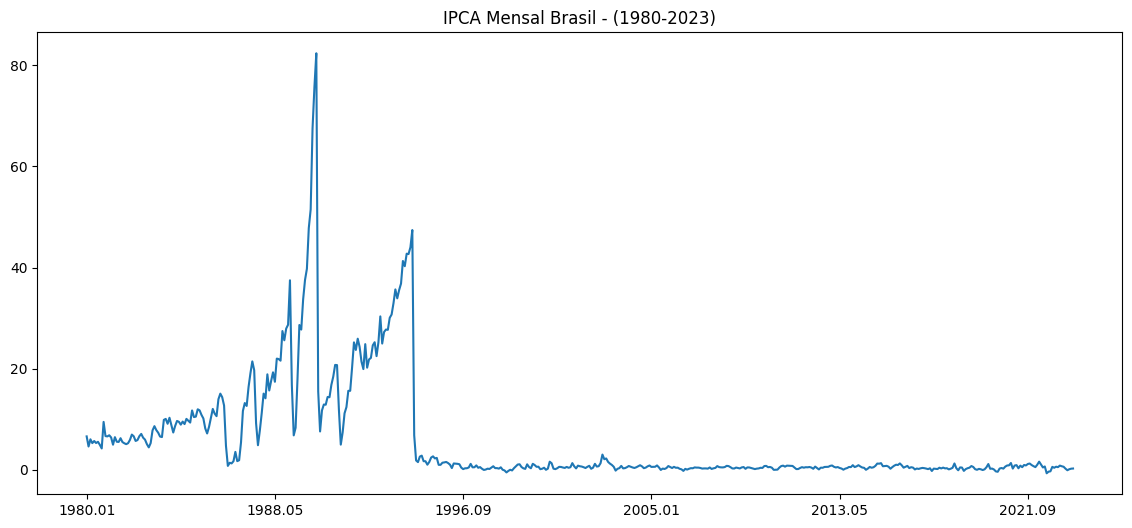

In [5]:
plot(ipca,'ipca','1980-2023')

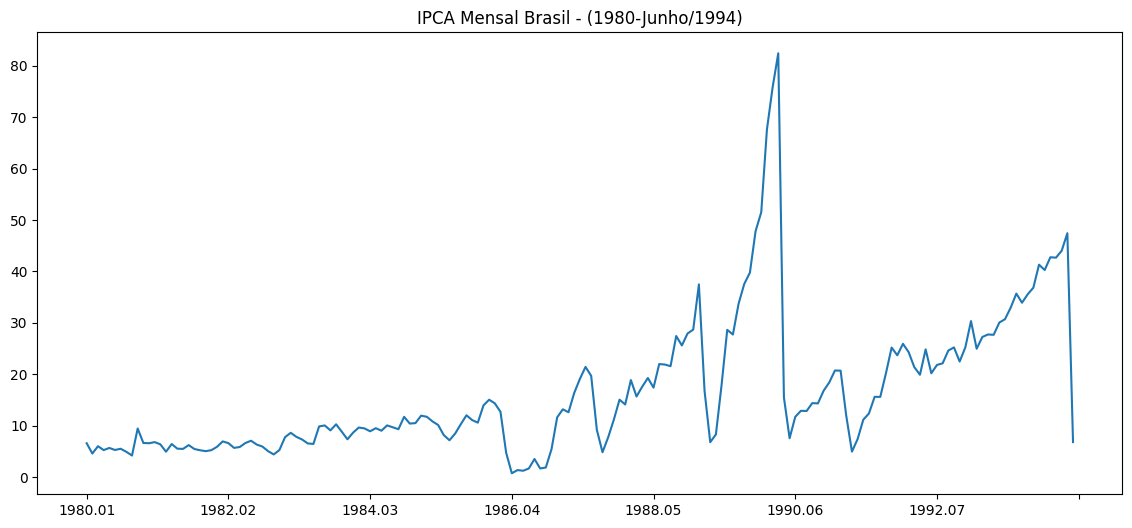

In [6]:
plot(ipca_pre_real,'ipca','1980-Junho/1994')

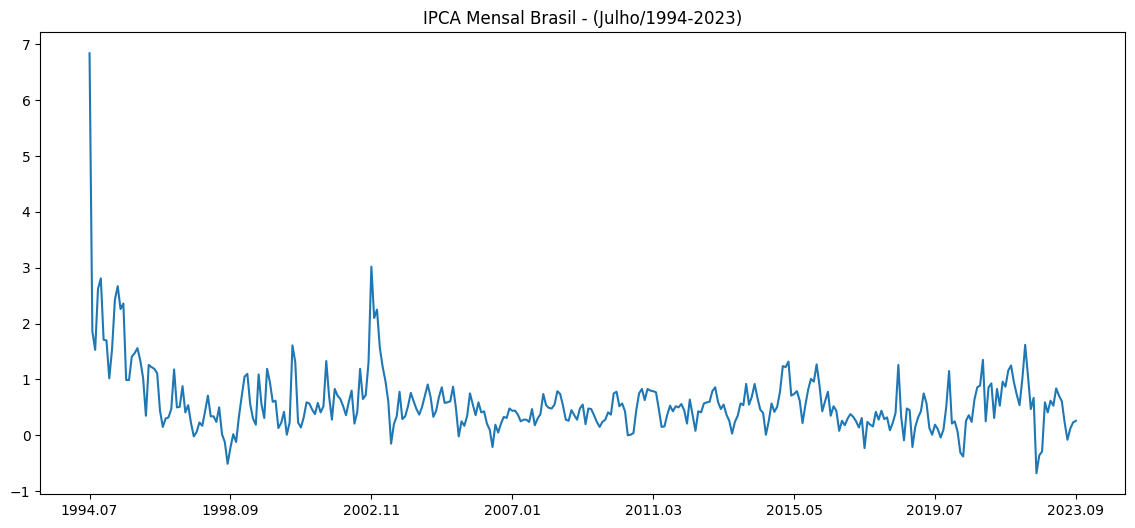

In [7]:
plot(ipca_real,'ipca','Julho/1994-2023')

# M2

In [8]:
vetor_ipca = ipca['ipca'].to_list()
vetor_ipca_filtrado = vetor_ipca[103:524]
vetor_m2 = m2['variacao'].to_list()
data_indice = ipca.index.to_list()
data = data_indice[103:524]

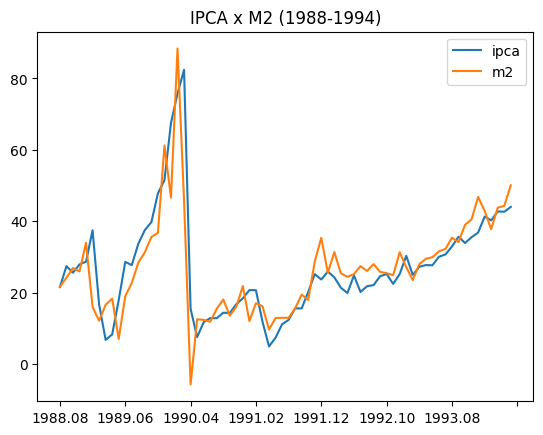

In [11]:
tabela_ipca_m2 = pd.DataFrame({'ipca': vetor_ipca_filtrado,
                               'm2': vetor_m2},
                               index = data)
# plt.figure(figsize=(14,6))
tabela_ipca_m2.iloc[0:70].plot()
plt.xlabel('')
plt.title('IPCA x M2 (1988-1994)')
plt.show()

tabela_ipca_m2.to_csv('questao3.csv', decimal = ',')